In this notebook I am using visualization tools and trying to answer important questions about the number of suicides all over the world in the period 1985-2016. The data I am using is from Kaggle called "Suicide Rates Overview 1985 to 2016:
Compares socio-economic info with suicide rates by year and country".

I have used matplotlib in past but I am fairly new to seaborn. A notebook in kaggle was very helpful in increasing my familiarity with it.
Link: https://www.kaggle.com/rblcoder/mental-health-happiness-economics-human-freedom

In addition to seaborn I have used plotly which is more interactive library. 
Link: https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e

### Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pylab as plt

#Setting style for our plots
import seaborn as sns
sns.set(style="ticks")
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# data science imports
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode
cf.go_offline()

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
init_notebook_mode()

Initially, I have planned to use just one dataset(the suicides one) but later I have decided to add one happiness datset from the year 2015 as well because the word suicide all over the notebook was very somber. 
Link: https://www.kaggle.com/unsdsn/world-happiness

### Importing Datasets

In [3]:
suicides_data = pd.read_csv('C://Users//shwet//Desktop//personal_projects//master.csv')

In [4]:
suicides_data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [47]:
suicides_data['country'].nunique()

101

In [5]:
suicides_data.shape

(27820, 12)

In [6]:
happiness_data = pd.read_csv('C://Users//shwet//Desktop//personal_projects//2015.csv')

Columns description:
- Country: Name of the country.
- Region: Region the country belongs to.
- Happiness Rank: Rank of the country based on the Happiness Score.
- Happiness Score: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
- Standard Error: The standard error of the happiness score.
- Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness Score.
- Family: The extent to which Family contributes to the calculation of the Happiness Score
- Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score
- Freedom: The extent to which Freedom contributed to the calculation of the Happiness Score.
- Trust (Government Corruption): The extent to which Perception of Corruption contributes to Happiness Score.
- Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score.
- Dystopia Residual: The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [7]:
happiness_data.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [8]:
happiness_data.shape

(158, 12)

### Countries with highest suicide numbers

In [25]:
suicides_data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(15).iplot(x='country',y='suicides_no',xTitle = 'Country', yTitle = 'Number of Suicides', kind='bar');

The country with highest number of suicides Russian Federation, United States and Japan.

### Countries with highest GDP per capita

In [27]:
suicides_data.groupby(by=['country'])['gdp_per_capita ($)'].sum().reset_index().sort_values(['gdp_per_capita ($)'],ascending=True).tail(15).iplot(x='country',y='gdp_per_capita ($)',xTitle ='GDP per Capita in dollars', yTitle = 'Country', kind='barh');

- The countries with highest GDP per capita are Luxembourg, Norway and Switzerland. These countries are not even in top 15 countries with highest suicide number
- Russian Federation is no where in top 15.
- United Sates and Japan are there in top 15 highest GDP per capita countries but they are in lower positions in the list.
- GDP per capita might or might not have inverse effect on suicides number, we will see that later. But from these two graphs there is slight hint that there can be.

### Number of suicides sorted countrywise in different age groups:

In [11]:
suicides_data.groupby(['country','age']).suicides_no.sum().nlargest(15).iplot(
    kind='bar', yTitle='Number of Suicides', linecolor='black', title='Number of suicides vs Age groups')

- Russian Federation has highest number of suicides between the age range of 35-54 years. It is not that surprising since country also registers levels of depression above the regional levels.

- But it is opposed to general notion that teenage Americans have highest suicide rate which are on number 10. In Top 3 is the age group of 35-54 years. The reasons can be loneliness, unsatisfactory lifestyle or lack of motivation to do anything.

### Gender vs Suicide numbers in different years

In [31]:
suicides_data.pivot_table(index='year',columns='sex',values='suicides_no', aggfunc='sum').iplot(xTitle = 'Year', yTitle = 'Number of Suicides');

- There is a big gap between female and male suicides rate. Female suicide rate is less as compared to Male. 
- Initially around 1987 both female and male suicide number increased. But later it is constant in females whereas in males it is not uniform. 
- In the year 2015 there seems to be drop in both. 

### Distribution of sex vs suicides_number in different age groups

In [13]:
suicides_data.pivot_table(index='age',columns='sex',values='suicides_no', aggfunc='sum').iplot(
    kind='bar', yTitle='Number of Suicides', linecolor='black', title='Number of suicides vs Age groups')

- If we also include sex in age group vs number of suicides distribution, we can see in above plot that number of males who commit suicide is more than females in all the age groups.
- The difference is significant in age group 35-54 years.

### Comparison of suicides number in years 1990-2010 in different countries

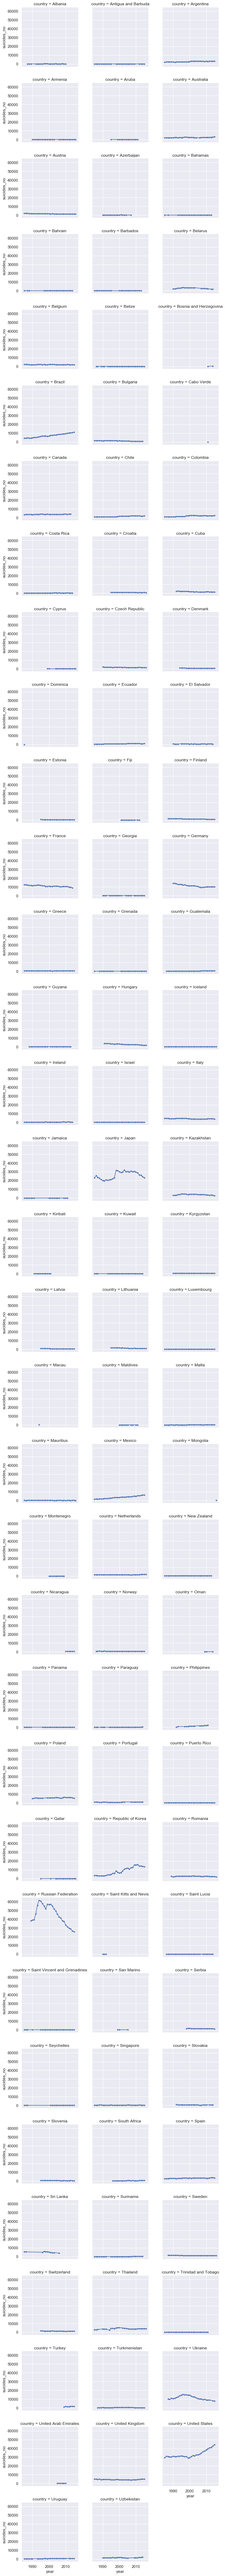

In [14]:
g = sns.FacetGrid(suicides_data.groupby(['country','year']).suicides_no.sum().reset_index(), col="country", col_wrap=3)
g = g.map(plt.plot, "year", "suicides_no", marker=".")

- Number of suicides in most of the countries is mostly constant between 1990-2010.But there are few exceptions.
- In Brazil and Mexico, it increased linearly.
- In Japan and Republic of Korea, it is non-uniform.
- In Russian Federation there is sudden increase in 1990, then non-uniform and then decrease around in 2000.
- In United States there is linear increase after 2000.
- Most of the countries have missing values that is why there plots look half completed.

### Highest Number of Suicides between 2011 and 2015

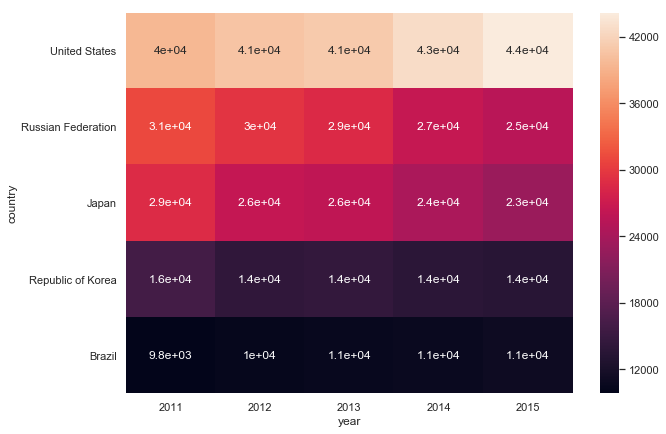

In [15]:
p = pd.crosstab(index=suicides_data.country,columns=suicides_data.year,values=suicides_data.suicides_no,aggfunc='sum')

sns.heatmap(p.loc[:,2011:2015].sort_values(2015, ascending=False).dropna().head(5),annot=True);

pp = pd.crosstab(index=suicides_data.country,columns=suicides_data.year,values=suicides_data.population,aggfunc='sum')

pdivpp = p/pp*10000

- Between 2011 and 2015 highest number of suicides are constantly in United States followed by Russian Federation which has highest number overall from 1985.
- The number of suicides are constantly increasing in United States. But in case of Russian Federation it seems to be decreasing. 
- In other countries too it seems to be decreasing.

### GDP per capita change from 1985 to 2015

In [51]:
layout = dict(
    xaxis=dict(type='log', title='year'),
    yaxis=dict(title='gdp_per_capita ($)'),
    title='GDP_per_capita ($) between 1985-2015')

suicides_data.sort_values('year').iplot(
    x='year',
    y='gdp_per_capita ($)',
    layout=layout,
    mode='markers',
    bestfit=True,
    bestfit_colors=['blue'])

Overall GDP per capita have been increasing almost linearly from 1985-2015.

### GDP per capita vs Suicides per 100k Population

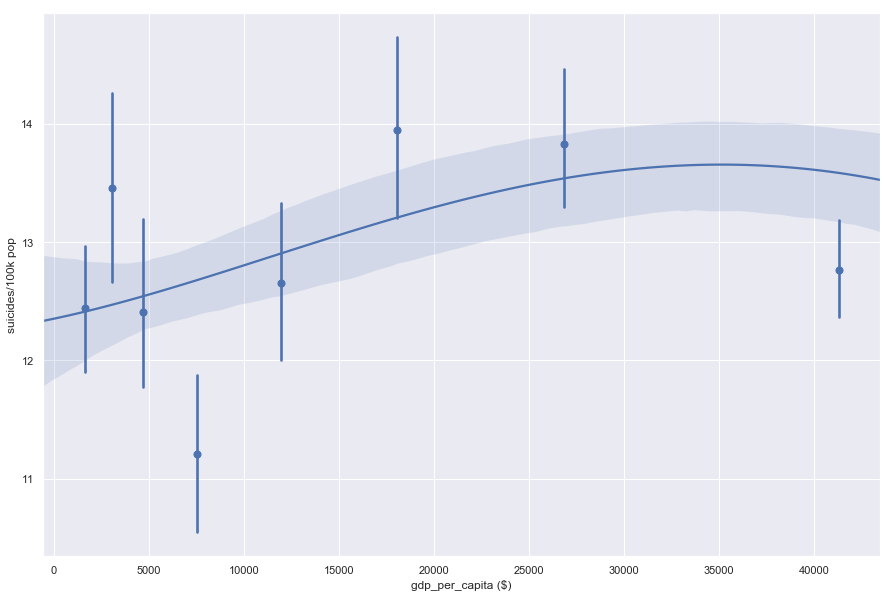

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.regplot(data=suicides_data, x='gdp_per_capita ($)', y='suicides/100k pop', x_jitter=0.2, order=4, x_bins=8)

The number of suicides per 100k population seems to be increasing  with GDP per capita.

In [34]:
from sklearn import preprocessing
data_mean= suicides_data.pivot_table(['suicides/100k pop','gdp_per_capita ($)'],
               ['year'], aggfunc='mean')
x = data_mean.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_mean_scaled = pd.DataFrame(x_scaled)
data_mean_scaled.columns = data_mean.columns
data_mean_scaled.index = data_mean.index
data_mean_scaled.iplot(xTitle ='Year');

- Overall GDP per capita has been increasing with sudden spike around 2002, which lowered during economic recession but again accelerated.
- Suicides per 100k population have growth till 1995 where they peaked. But after that they have been decreasing with one exception in 2012 which is a good news.
- It seems that with GDP per capita growth, number of suicides is lower than before.

## Bring on some Happiness

Enough with suicides let's move on to some happiness data to end this notebook on happy note.

### Happiness Rank of different countries

In [53]:
happiness_data[happiness_data.Country.str.contains("Russia")]
countries = ['Russia','United States','Japan','Switzerland','India','Germany','South Korea',
'Brazil','Poland','United Kingdom','Italy','Togo','Thailand','Canada','Kazakhstan']
happiness_dr = happiness_data[happiness_data.Country.isin(countries)].drop('Region',axis=1).set_index('Country')
sns.set(rc={'figure.figsize':(15,15)})
happiness_dr['Happiness Rank'].iplot(kind='barh', xTitle = 'Happiness Rank', yTitle = 'Country', title='Happiness Rank 2015 for countries listed above');

- This plot shows happiness rank of randomly chosen countries.
- Here Switzerland seems to be ranked best in the Happiness score, United States is far behind at rank 15.
- Togo is the least ranked country.

### Happiness_Score vs GDP per Capita of different regions

In [74]:
happiness_data.iplot(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    categories='Region',
    mode='markers',
    size=7,
    layout=dict(
        xaxis=dict(title='Economy (GDP per Capita)'),
        yaxis=dict(title='Happiness Score'),
        title='Happiness_Score vs GDP per Capita'))

- Happiness Score seems to be directly correlated with GDP per capita.
- Sub Saharan African countries with low GDP per capita have low Happiness score and lies mostly in bottom left of plot.
- In contrast, Western Europe is mostly in upper right with high GDP per capita and highest Happiness scores.

### Happiness Rank vs Life Expectancy 

In [75]:
happiness_data.iplot(x = 'Happiness Score', y = 'Freedom', mode='lines+markers', opacity=0.8,
    xTitle='Happiness_Score',
    yTitle = 'Life Expectancy',
    title='Happiness Rank vs Life Expectancy',
    size=4,
    bestfit = True,
    bestfit_colors=['green'],
    symbol=1)

In [67]:
import plotly.figure_factory as ff
corrs = happiness_data.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale ='Viridis',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 600
figure.layout.width = 1000

iplot(figure)